In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from pandas.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from matplotlib import cm


In [102]:
%matplotlib inline

In [103]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ibriiee/video-games-sales-dataset-2022-updated-extra-feat")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/video-games-sales-dataset-2022-updated-extra-feat


In [104]:
df2 = pd.read_csv('/kaggle/input/video-games-sales-dataset-2022-updated-extra-feat/Video_Games.csv')
df2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# Last 5 rows
df2.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


 ## Q1 Logan : How do different video game genres perform across various global regions in terms of sales?

In [106]:
genre_sales = (
    df2
    .groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
    .sum()
    .reset_index()
    .rename(columns={'Other_Sales':'ROW_Sales'})
)

# Added and sort by Global
genre_sales['Global_Sales'] = genre_sales[['NA_Sales','EU_Sales','JP_Sales','ROW_Sales']].sum(axis=1)
genre_sales = (
    genre_sales
    .sort_values('Global_Sales', ascending=False)
    .reset_index(drop=True)
)

# Round for display # ROW is Rest of the worlds
genre_sales[['NA_Sales','EU_Sales','JP_Sales','ROW_Sales','Global_Sales']] = \
    genre_sales[['NA_Sales','EU_Sales','JP_Sales','ROW_Sales','Global_Sales']].round(1)

print(genre_sales)

           Genre  NA_Sales  EU_Sales  JP_Sales  ROW_Sales  Global_Sales
0         Action     879.0     519.1     161.4      184.6        1744.2
1         Sports     684.4     376.8     135.5      134.5        1331.3
2        Shooter     592.2     317.3      38.8      104.1        1052.4
3   Role-Playing     330.8     188.7     355.5       59.6         934.6
4       Platform     445.5     200.4     130.8       51.1         827.8
5           Misc     407.3     212.7     108.1       74.4         802.5
6         Racing     359.4     236.5      56.7       76.1         728.7
7       Fighting     223.4     100.3      87.5       36.4         447.5
8     Simulation     182.2     113.5      63.8       30.8         390.3
9         Puzzle     122.9      50.0      57.3       12.4         242.6
10     Adventure     105.3      63.5      52.3       16.5         237.6
11      Strategy      68.6      45.2      49.7       10.8         174.2


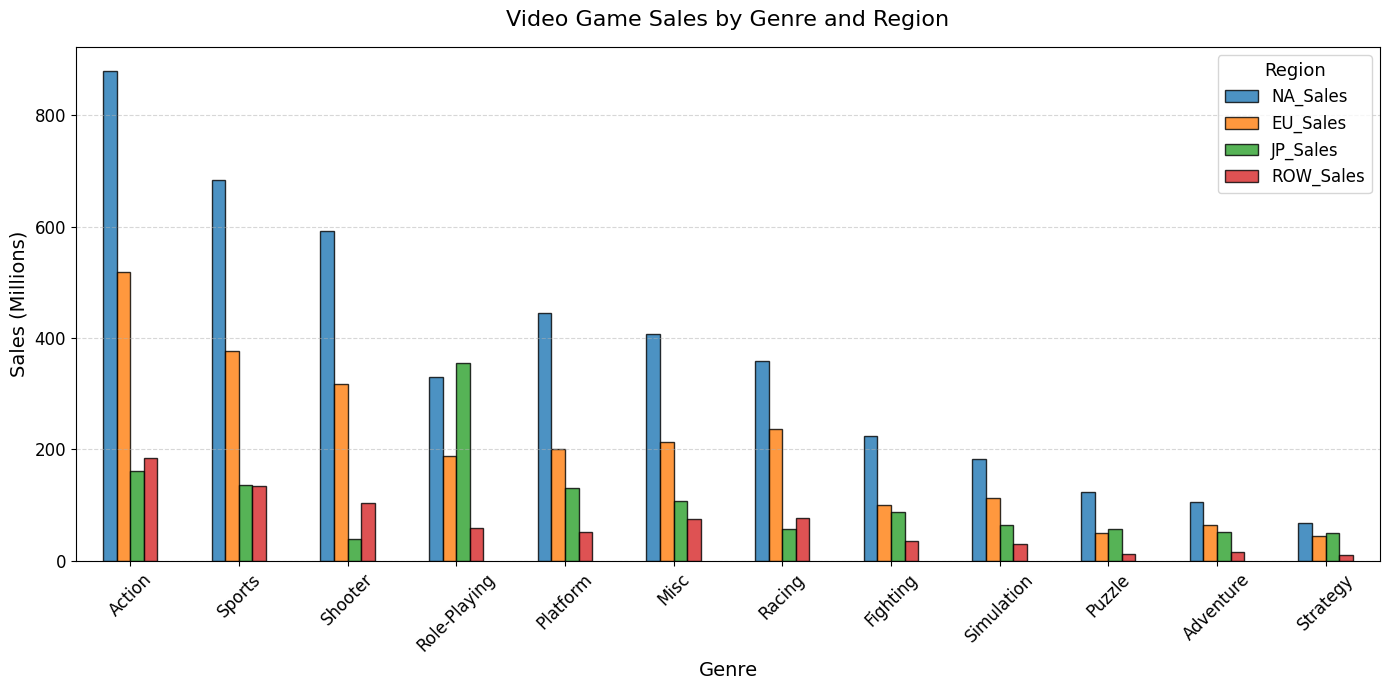

In [107]:
ax = genre_sales.set_index('Genre')[['NA_Sales','EU_Sales','JP_Sales','ROW_Sales']]\
    .plot(
        kind='bar', figsize=(14,7),
        alpha=0.8, edgecolor='k'
    )

ax.set_ylabel('Sales (Millions)', fontsize=14)
ax.set_xlabel('Genre', fontsize=14)
ax.set_title('Video Game Sales by Genre and Region', fontsize=16, pad=15)
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.legend(title='Region', fontsize=12, title_fontsize=13)
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

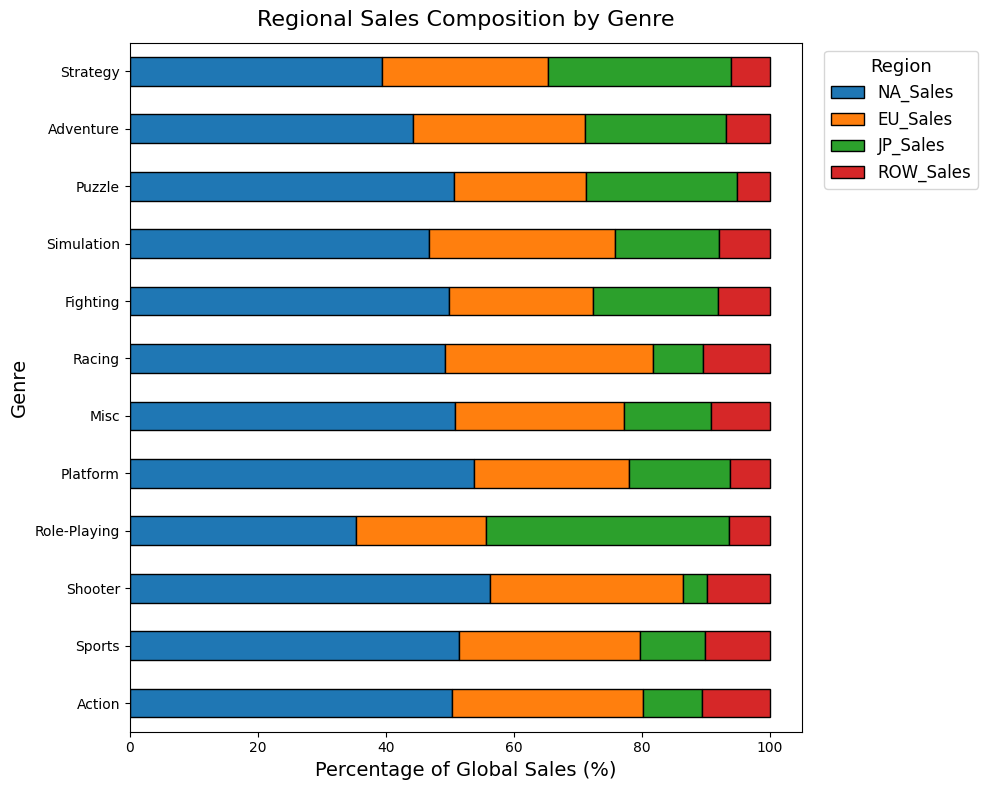

In [108]:
# Calculate percentage share of regional sales within each genre
# check Global Sales is calculated and available in genre sales
percent_share = genre_sales.set_index('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'ROW_Sales']].div(genre_sales.set_index('Genre')['Global_Sales'], axis=0) * 100

ax = percent_share.plot(
    kind='barh', stacked=True,
    figsize=(10,8), edgecolor='k'
)
ax.set_xlabel('Percentage of Global Sales (%)', fontsize=14)
ax.set_ylabel('Genre', fontsize=14)
ax.set_title('Regional Sales Composition by Genre', fontsize=16, pad=12)
ax.legend(title='Region', fontsize=12, title_fontsize=13, bbox_to_anchor=(1.02,1))
plt.tight_layout()
plt.show()

/tmp/ipython-input-109-253016006.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]


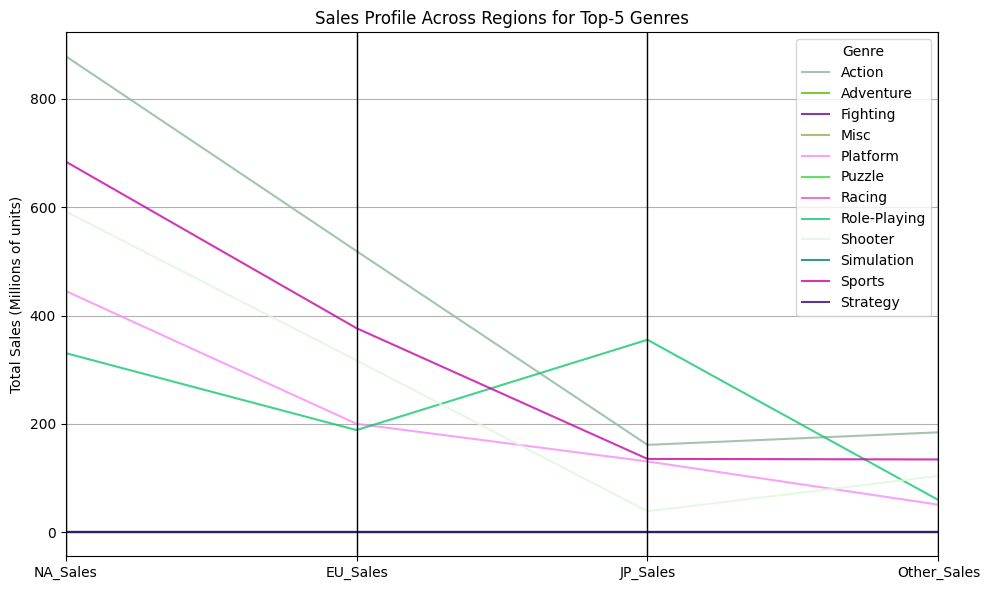

In [109]:
# Identify the top‑5 genres by total global sales
TOP_N = 5

top5_genres = (
    df_clean.groupby('Genre', observed=False)['Global_Sales']
            .sum()
            .nlargest(TOP_N)
            .index
)

# Aggregate regional totals for genres
pc_data = (
    df_clean[df_clean['Genre'].isin(top5_genres)]
      .groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
      .sum()
      .reset_index()
)

# Parallel‑coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(
    pc_data,
    class_column='Genre',
    cols=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
    alpha=0.8
)
plt.title('Sales Profile Across Regions for Top‑5 Genres')
plt.ylabel('Total Sales (Millions of units)')
plt.legend(loc='upper right', title='Genre')
plt.tight_layout()
plt.show()

Average sales by genre:
            Genre  avg_sales
0         Action   0.517884
1      Adventure   0.182417
2       Fighting   0.527067
3           Misc   0.458960
4       Platform   0.932523
5         Puzzle   0.419000
6         Racing   0.583587
7   Role-Playing   0.622933
8        Shooter   0.795873
9     Simulation   0.446705
10        Sports   0.567291
11      Strategy   0.255490


/tmp/ipython-input-85-3954632134.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Genre')['Global_Sales']


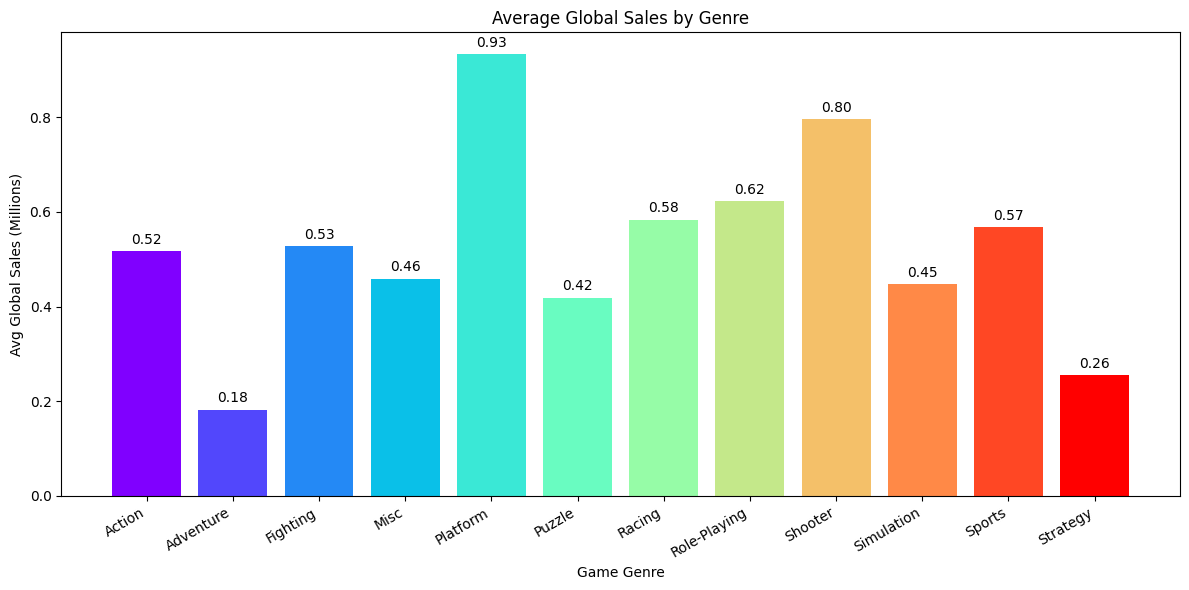

In [85]:
# the average sales for each genre
genre_summary = (
    df_clean
    .groupby('Genre')['Global_Sales']
    .mean()
    .reset_index()
)

genre_summary.columns = ['Genre', 'avg_sales']
print("Average sales by genre:\n", genre_summary)

num_genres = len(genre_summary)
cmap = plt.cm.rainbow
colors = cmap(np.linspace(0, 1, num_genres))
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(
    genre_summary['Genre'],
    genre_summary['avg_sales'],
    color=colors
)

for bar in bars:
    yval = bar.get_height()
    ax.annotate(
        f"{yval:.2f}",
        xy=(bar.get_x() + bar.get_width() / 2, yval),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center',
        va='bottom'
    )

ax.set_xlabel("Game Genre")
ax.set_ylabel("Avg Global Sales (Millions)")
ax.set_title("Average Global Sales by Genre")

# rotate x-labels so they don’t overlap
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

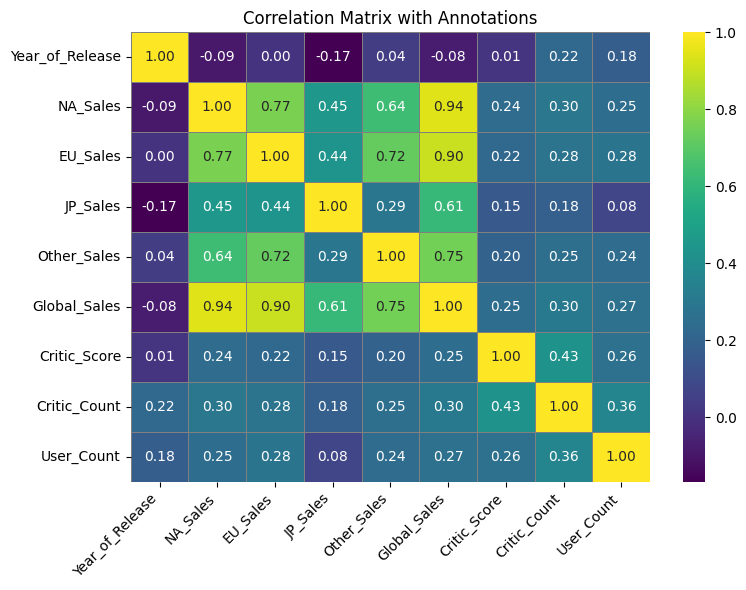

In [86]:
# Heatmap for correlation matrix
# Calculate the correlation matrix for numeric columns
corr = df_clean.corr(numeric_only=True)

# Heatmap correlation matrix with annotations
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5, linecolor='gray')
plt.title("Correlation Matrix with Annotations")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Q2 ADRIEL: How have video game sales evolved over the years?

In [87]:
# Clean the data (no null values etc.)
df_clean = clean_video_games(df2)
df_clean.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


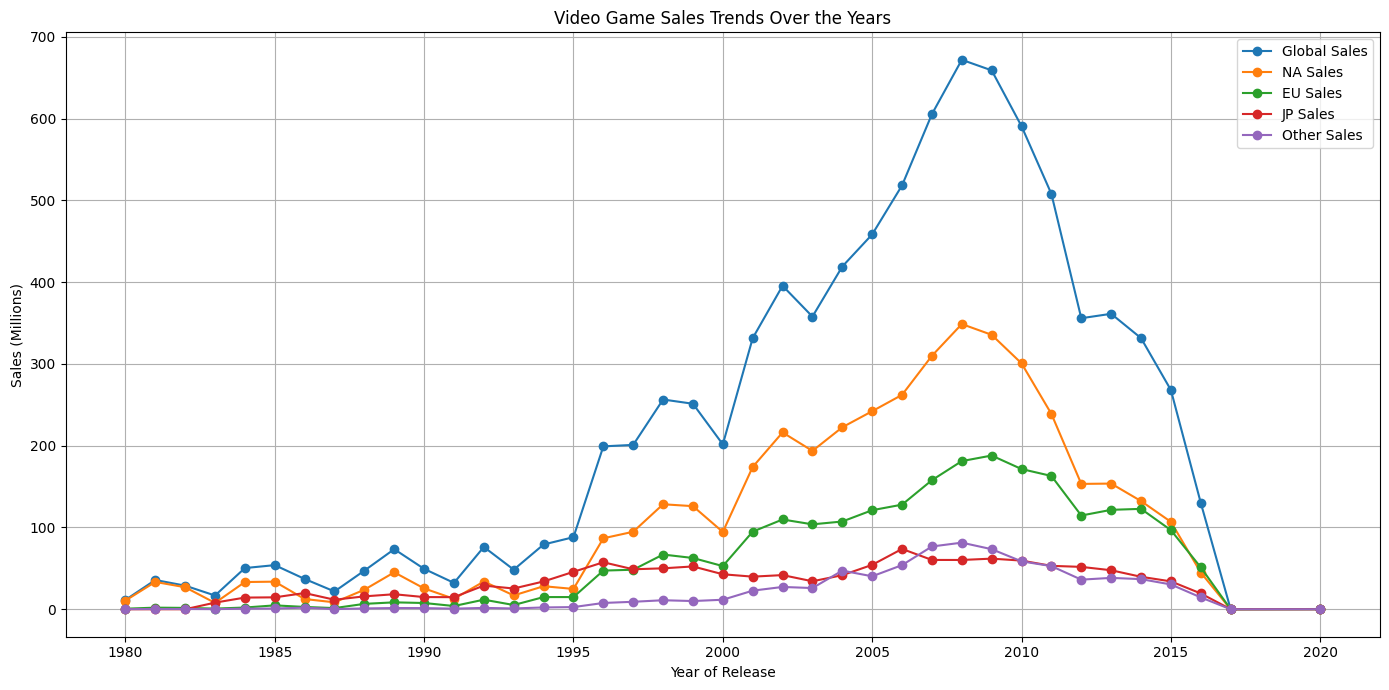

In [88]:
# Total sales per year (sum)
yearly_sales = (
    df_clean
    .groupby('Year_of_Release')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
    .sum()
    .reset_index()
)

# Plot total sales trends
plt.figure(figsize=(14,7))
plt.plot(yearly_sales['Year_of_Release'], yearly_sales['Global_Sales'], marker='o', label='Global Sales')
plt.plot(yearly_sales['Year_of_Release'], yearly_sales['NA_Sales'], marker='o', label='NA Sales')
plt.plot(yearly_sales['Year_of_Release'], yearly_sales['EU_Sales'], marker='o', label='EU Sales')
plt.plot(yearly_sales['Year_of_Release'], yearly_sales['JP_Sales'], marker='o', label='JP Sales')
plt.plot(yearly_sales['Year_of_Release'], yearly_sales['Other_Sales'], marker='o', label='Other Sales')
plt.title('Video Game Sales Trends Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Sales (Millions)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

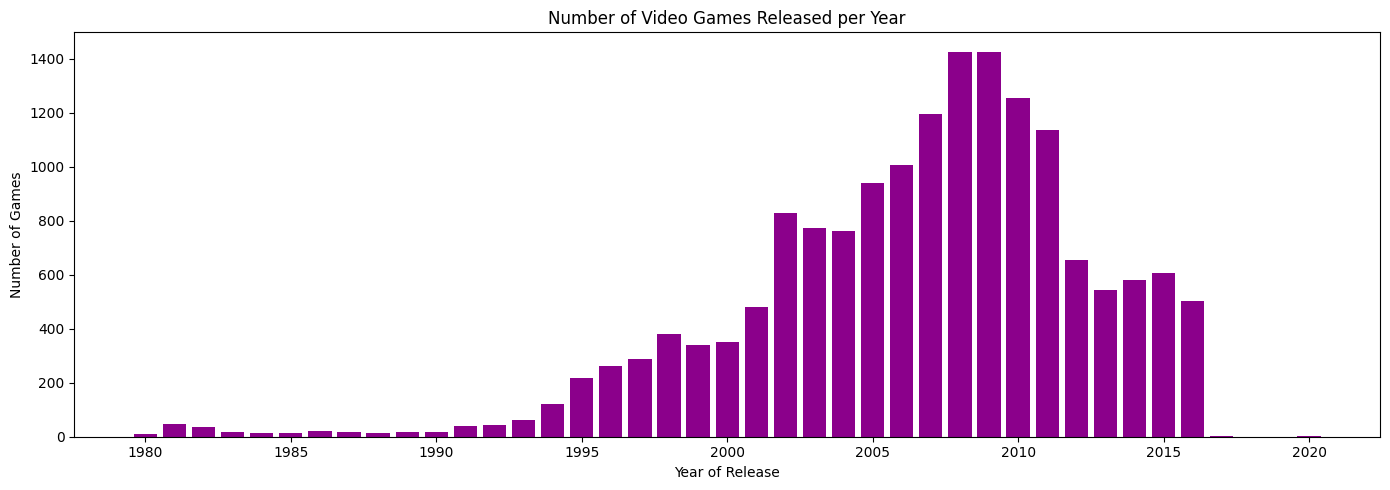

In [89]:
# Games released per year
games_per_year = df_clean.groupby('Year_of_Release').size()
plt.figure(figsize=(14,5))
plt.bar(games_per_year.index, games_per_year.values, color='darkmagenta')
plt.title('Number of Video Games Released per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.tight_layout()
plt.show()

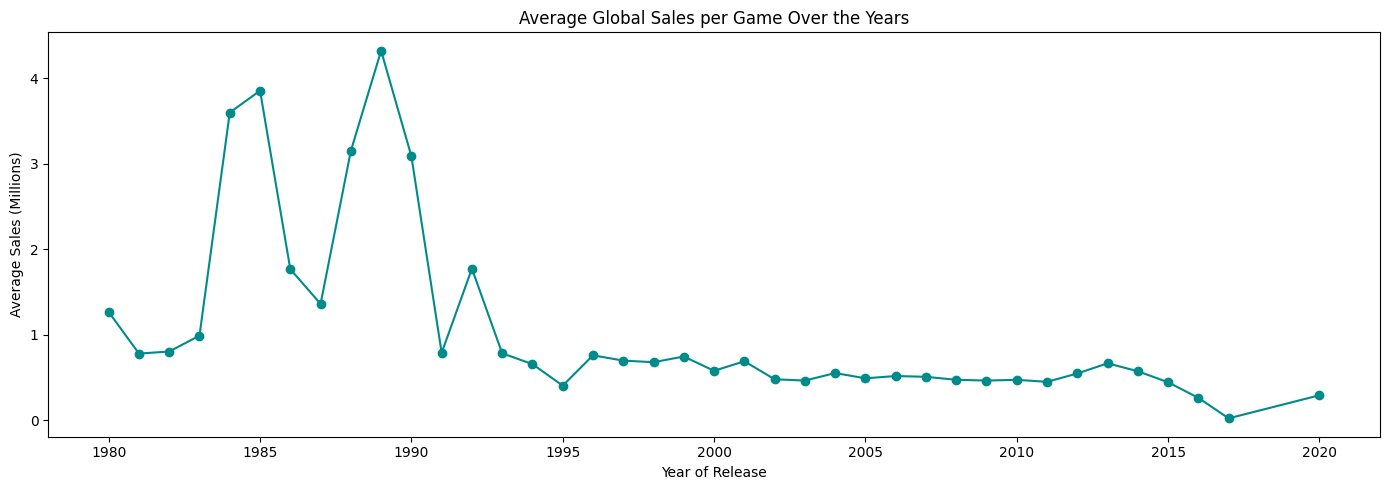

In [90]:
# Average sales per game (yearly sales / games per year)
avg_sales_per_game = yearly_sales['Global_Sales'] / games_per_year.values
plt.figure(figsize=(14,5))
plt.plot(yearly_sales['Year_of_Release'], avg_sales_per_game, marker='o', color='darkcyan')
plt.title('Average Global Sales per Game Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Average Sales (Millions)')
plt.tight_layout()
plt.show()

# Q3 Jin Hao: How do sales figures vary across different gaming platforms?

In [91]:
# Show names of gaming platforms
unique_platforms = df2['Platform'].unique()
unique_platforms_count = len(unique_platforms)
print(unique_platforms)
print(unique_platforms_count)

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
31


In [92]:
# Group by Platform and sum the sales
platform_sales = df2.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
display(platform_sales)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
2600,90.60,5.47,0.00,0.91,97.08
3DO,0.00,0.00,0.10,0.00,0.10
3DS,83.49,61.48,100.67,13.36,259.09
DC,5.43,1.69,8.56,0.27,15.97
DS,382.67,188.89,175.57,59.28,807.10
GB,114.32,47.82,85.12,8.20,255.45
GBA,187.54,75.25,47.33,7.73,318.50
GC,133.46,38.71,21.58,5.18,199.36
GEN,21.05,6.05,2.70,0.97,30.78


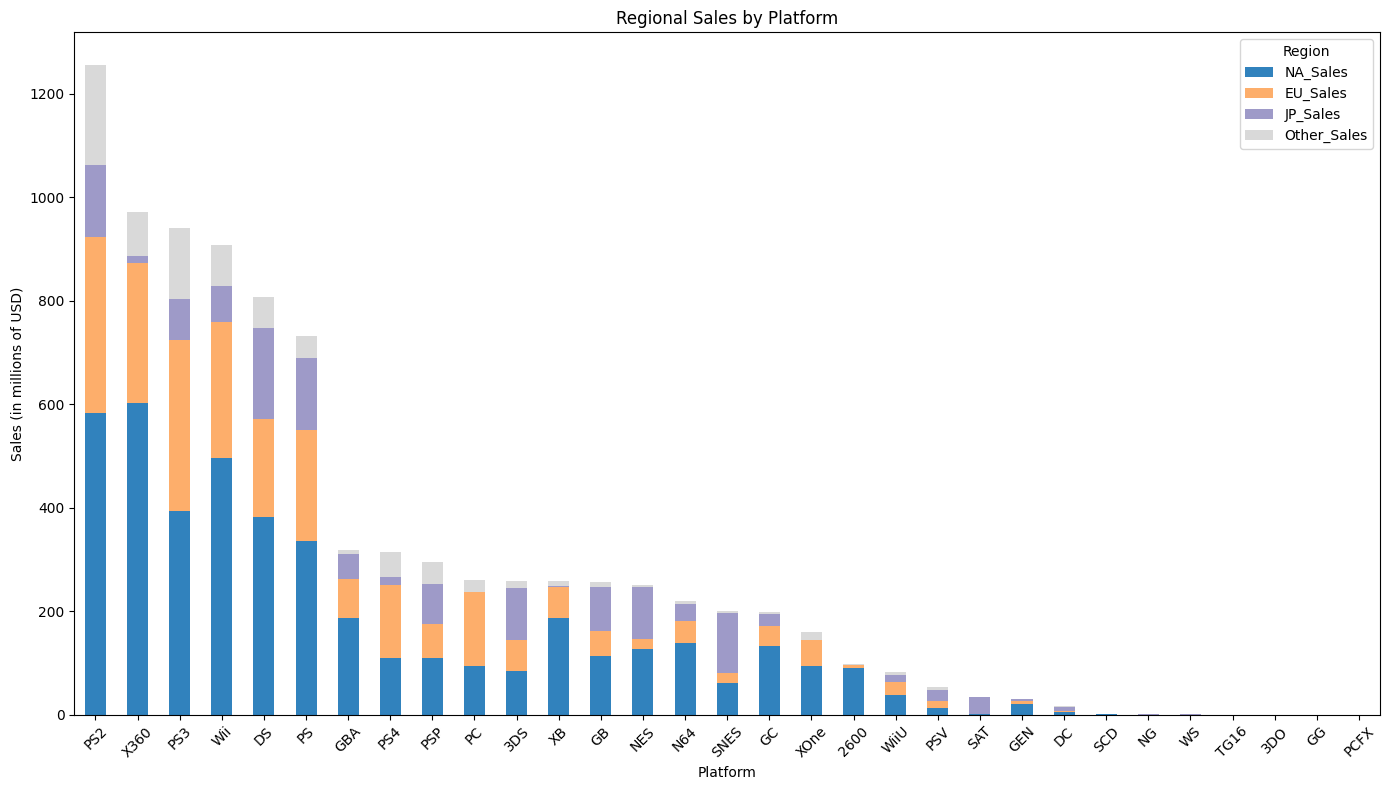

In [93]:
# Group by Platform and sum regional sales
regional_sales = df2.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Sort platforms by total sales in descending order
regional_sales = regional_sales.loc[regional_sales.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
regional_sales.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20c')

# Chart formatting
plt.title('Regional Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Sales (in millions of USD)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()

Text(0.5, 0, 'Platform')

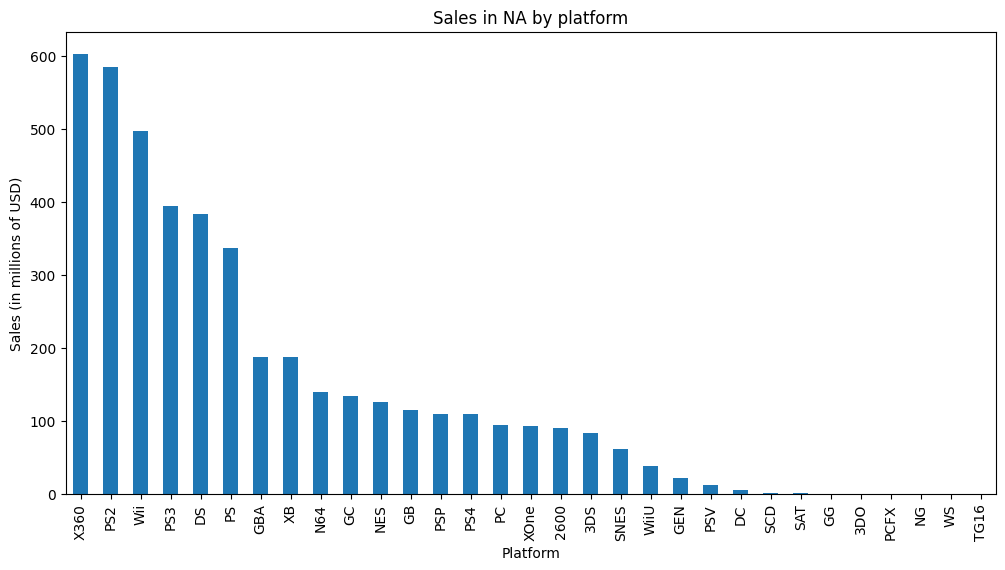

In [94]:
# Plot NA region sales
NA_region = df2.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False)
NA_region.plot(kind='bar', figsize=(12,6), title='Sales in NA by platform')

# Chart formatting
plt.ylabel('Sales (in millions of USD)')
plt.xlabel('Platform')

Text(0.5, 0, 'Platform')

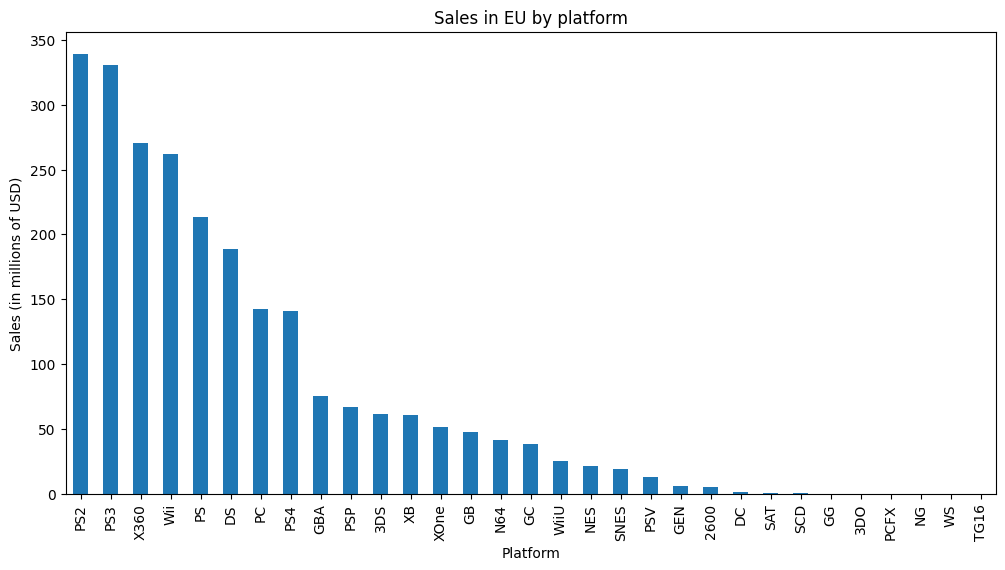

In [95]:
# Plot EU region sales
EU_region = df2.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=False)
EU_region.plot(kind='bar', figsize=(12,6), title='Sales in EU by platform')

# Chart formatting
plt.ylabel('Sales (in millions of USD)')
plt.xlabel('Platform')

Text(0.5, 0, 'Platform')

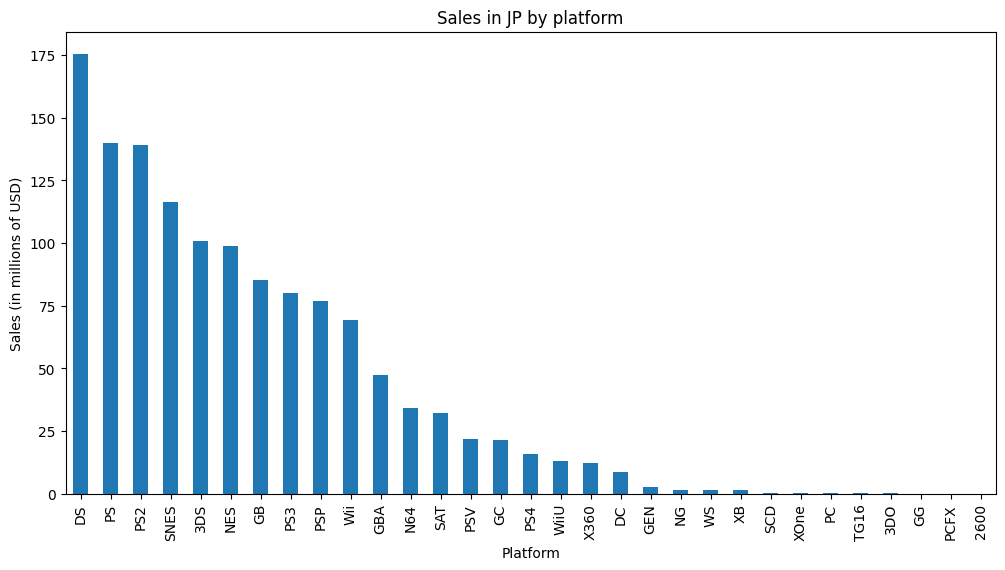

In [96]:
# Plot JP region sales
JP_region = df2.groupby('Platform')['JP_Sales'].sum().sort_values(ascending=False)
JP_region.plot(kind='bar', figsize=(12,6), title='Sales in JP by platform')

# Chart formatting
plt.ylabel('Sales (in millions of USD)')
plt.xlabel('Platform')

/tmp/ipython-input-97-1905866284.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sales, y='Platform', x='Global_Sales', palette='coolwarm')


(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

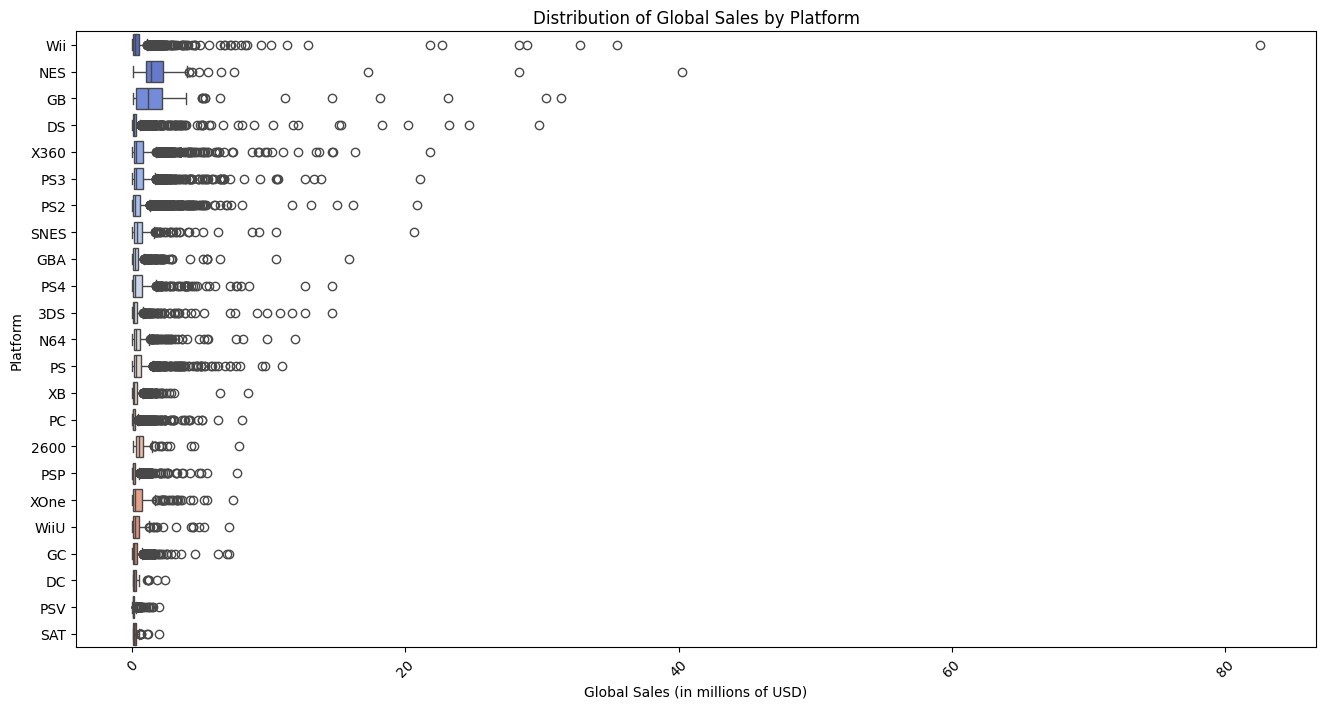

In [97]:
df_sales = df2[['Platform', 'Global_Sales']].copy()

# Filter out platforms with very few entries
platform_counts = df_sales['Platform'].value_counts()
df_sales = df_sales[df_sales['Platform'].isin(platform_counts[platform_counts > 30].index)]

# Remove rows with missing or zero sales
df_sales = df_sales[df_sales['Global_Sales'] > 0]

# Set figure size
plt.figure(figsize=(16, 8))

# Create the boxplot
sns.boxplot(data=df_sales, y='Platform', x='Global_Sales', palette='coolwarm')

# Chart formatting
plt.title('Distribution of Global Sales by Platform')
plt.xlabel('Global Sales (in millions of USD)')
plt.ylabel('Platform')
plt.xticks(rotation=45)

Outliers spreaed too far in the previous boxplot, making it difficult to read. Plotting new boxplot without outliers.

/tmp/ipython-input-98-517665353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sales, y='Platform', x='Global_Sales', palette='coolwarm', showfliers=False)


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 [Text(-0.5, 0, '−0.5'),
  Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5')])

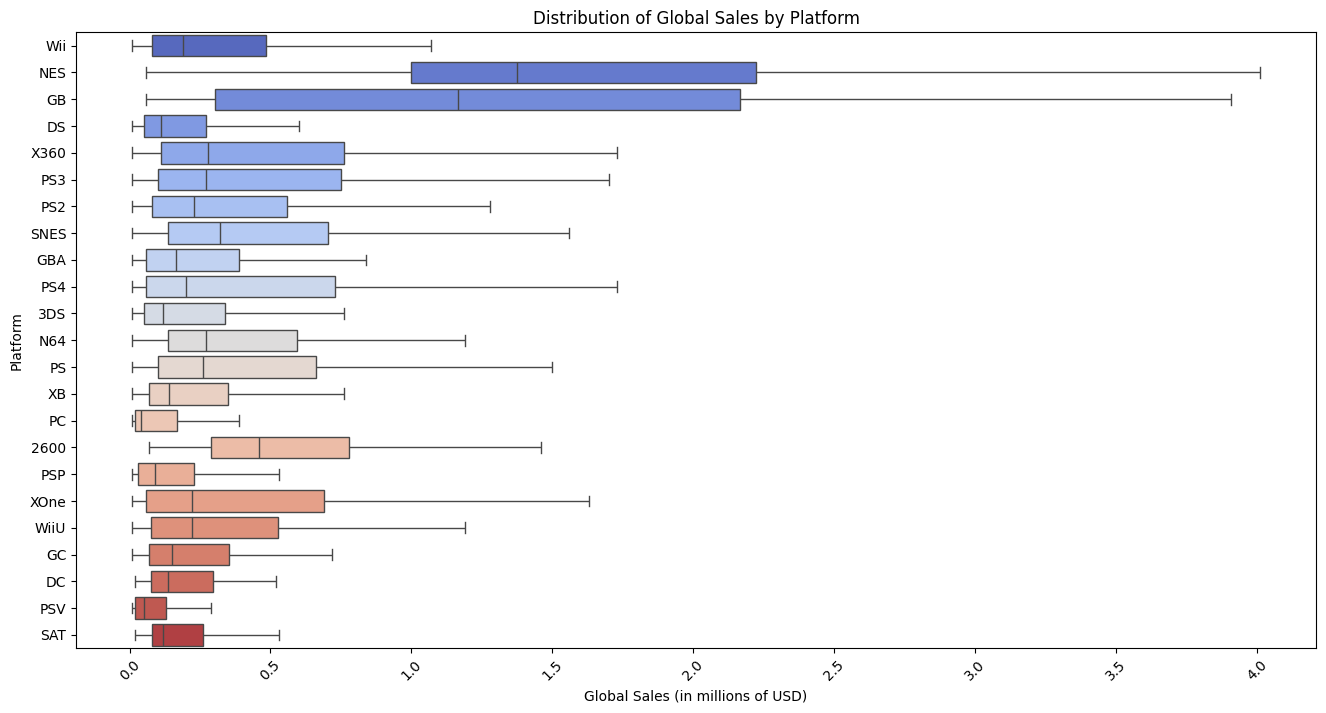

In [98]:
# Set figure size
plt.figure(figsize=(16, 8))

# Create the boxplot
sns.boxplot(data=df_sales, y='Platform', x='Global_Sales', palette='coolwarm', showfliers=False)

# Chart formatting
plt.title('Distribution of Global Sales by Platform')
plt.xlabel('Global Sales (in millions of USD)')
plt.ylabel('Platform')
plt.xticks(rotation=45)

Outliers seem to contribute to the vast majority of sales for platforms. Plotting boxplot with log scaled sales.

/tmp/ipython-input-99-3635675483.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sales, y='Platform', x='Global_Sales', palette='coolwarm')


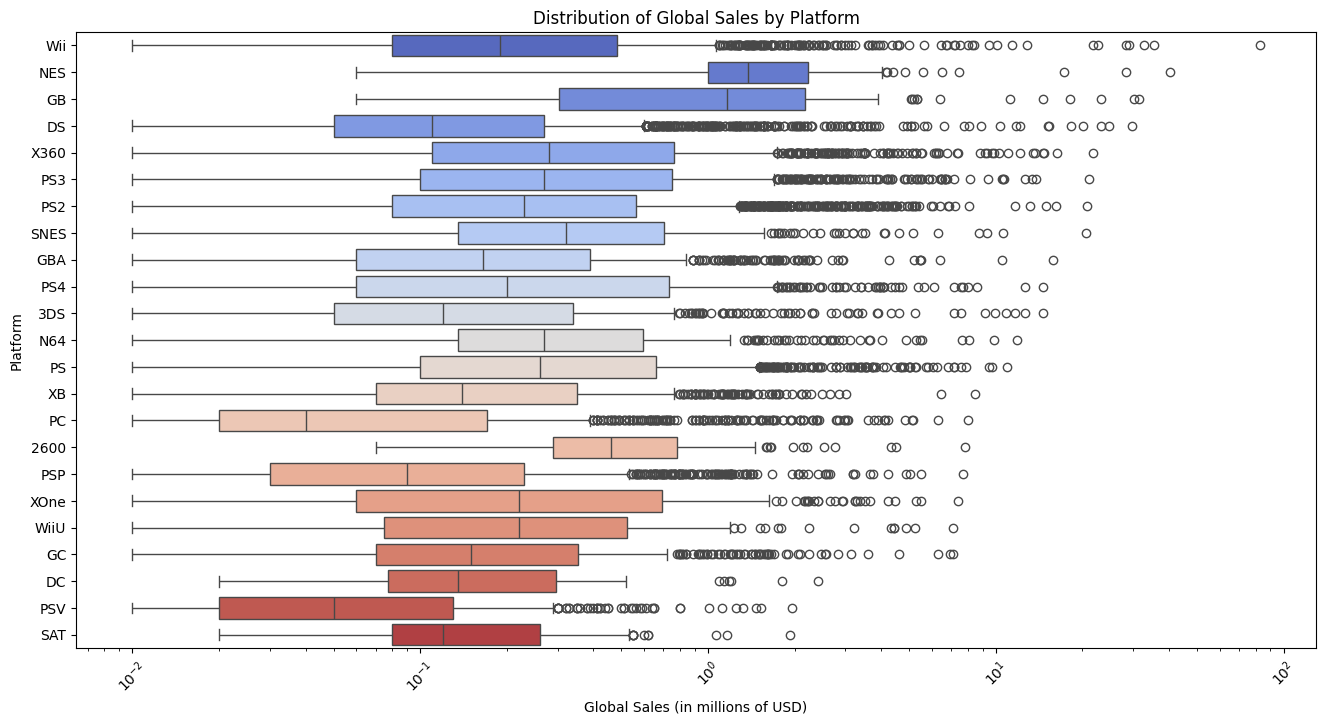

In [99]:
# Set figure size
plt.figure(figsize=(16, 8))

# Create the boxplot
sns.boxplot(data=df_sales, y='Platform', x='Global_Sales', palette='coolwarm')

# Improve readability
plt.title('Distribution of Global Sales by Platform')
plt.xlabel('Global Sales (in millions of USD)')
plt.ylabel('Platform')
plt.xticks(rotation=45)
plt.xscale('log')

## Q4 Muadz: How do critic scores correlate with sales?

In [ ]:
# Clean and filter to necessary columns only

df = pd.read_csv('/kaggle/input/video-games-sales-dataset-2022-updated-extra-feat/Video_Games.csv')

df_clean = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score']].dropna()
df_clean.shape

(8137, 6)

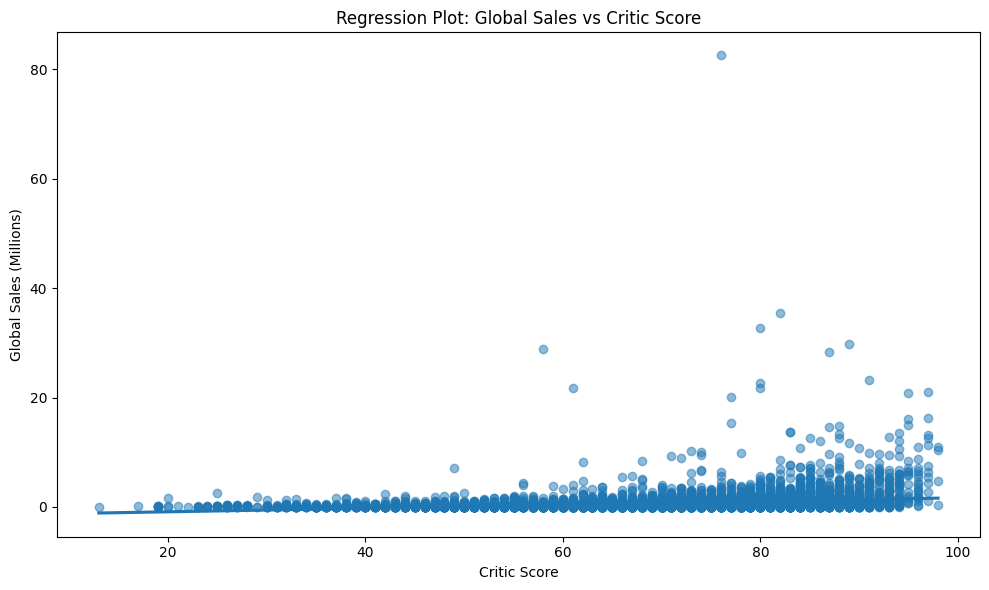

In [ ]:
# Strength of relationship between Global Sales(Total) and Critic Score
plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x='Critic_Score', y='Global_Sales', scatter_kws={'alpha': 0.5})
plt.title('Regression Plot: Global Sales vs Critic Score')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (Millions)')
plt.tight_layout()
plt.show()

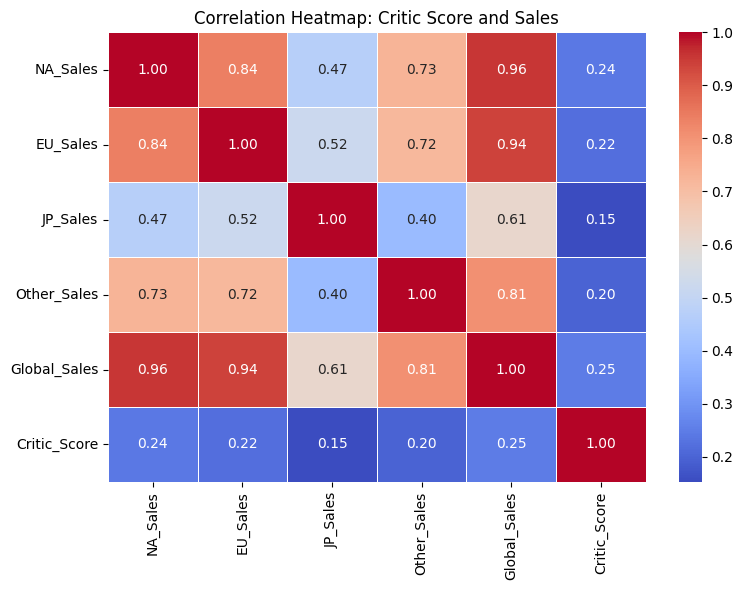

In [ ]:
# Visualise correlation strength using heatmap
correlation = df_clean.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Critic Score and Sales')
plt.tight_layout()
plt.show()

In [ ]:
# critic score binned into 4 bins
# 0-50 = Poor, 50-70 = Average, 70-80 = Good, 80-100 = Excellent

bins = [0, 50, 70, 80, 100]
labels = ['Poor', 'Average', 'Good', 'Excellent']
df_clean['Score_Bin'] = pd.cut(df_clean['Critic_Score'], bins=bins, labels=labels)

/tmp/ipython-input-34-1596262211.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_sales_by_bin = df_clean.groupby('Score_Bin')['Global_Sales'].sum()


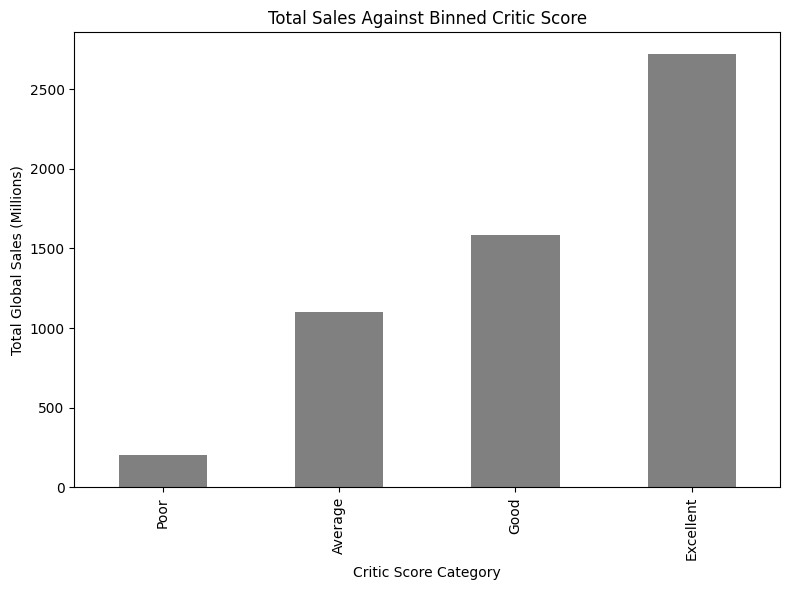

In [ ]:
# Plot bar chart: Total Sales against Critic Scores Category

total_sales_by_bin = df_clean.groupby('Score_Bin')['Global_Sales'].sum()
total_sales_by_bin.plot(kind='bar', figsize=(8, 6), color='gray')
plt.title('Total Sales Against Binned Critic Score')
plt.xlabel('Critic Score Category')
plt.ylabel('Total Global Sales (Millions)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-35-3272320658.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_regional_sales_by_bin = df_clean.groupby('Score_Bin')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()


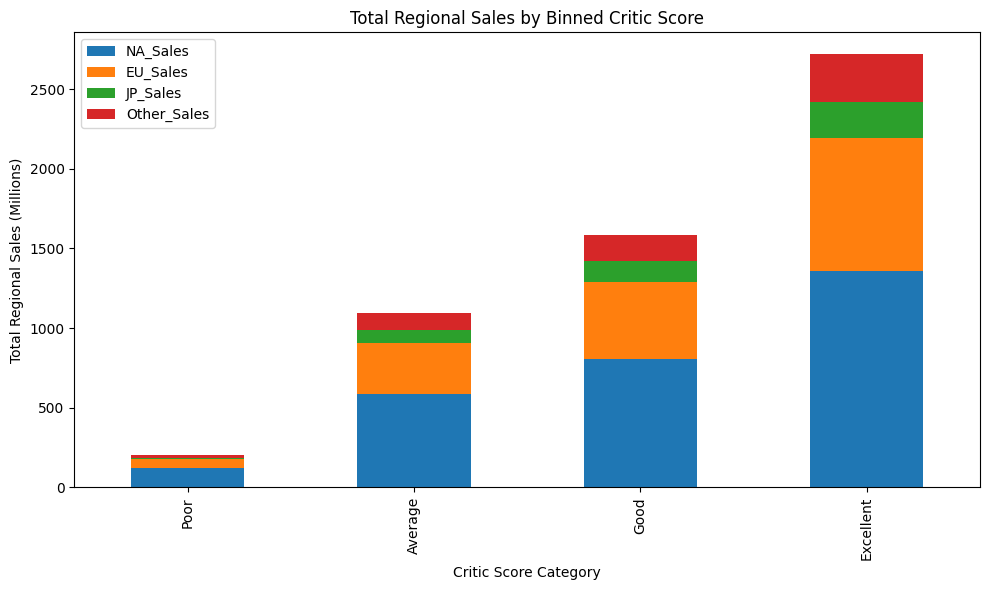

In [ ]:
# Stacked bar chart to observe each region's contribution

total_regional_sales_by_bin = df_clean.groupby('Score_Bin')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
total_regional_sales_by_bin.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Regional Sales by Binned Critic Score')
plt.xlabel('Critic Score Category')
plt.ylabel('Total Regional Sales (Millions)')
plt.tight_layout()
plt.show()

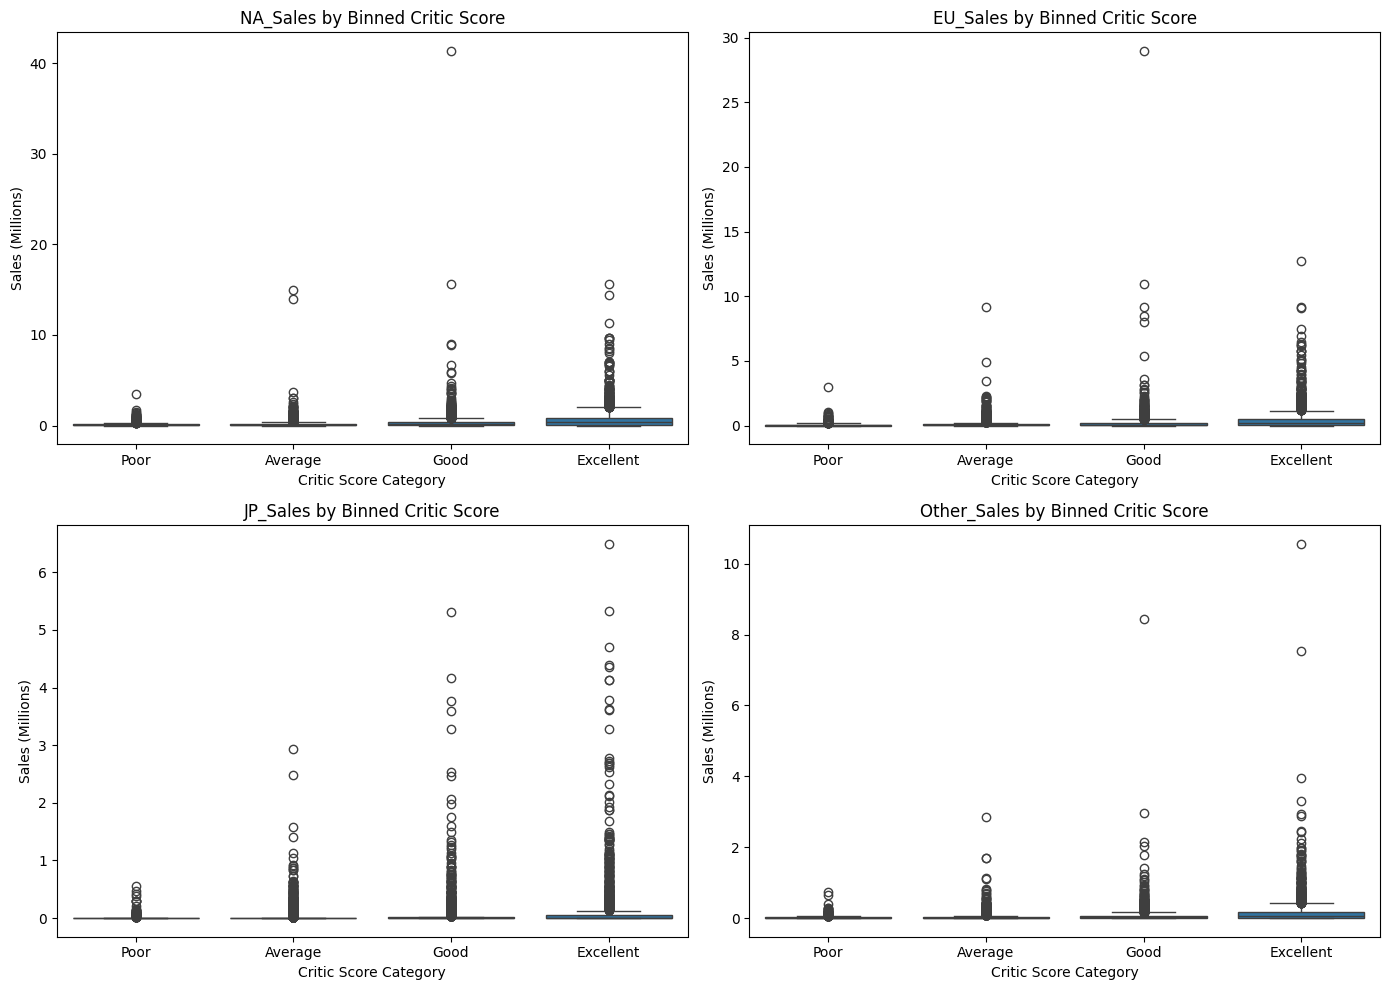

In [ ]:
# showing how sales vary across binned critic score groups for each sales region

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for i, region in enumerate(regions):
    sns.boxplot(data=df_clean, x='Score_Bin', y=region, ax=axes[i])
    axes[i].set_title(f'{region} by Binned Critic Score')
    axes[i].set_xlabel('Critic Score Category')
    axes[i].set_ylabel('Sales (Millions)')

plt.tight_layout()
plt.show()

**Here, each region only contains outliers from their own region, not others**

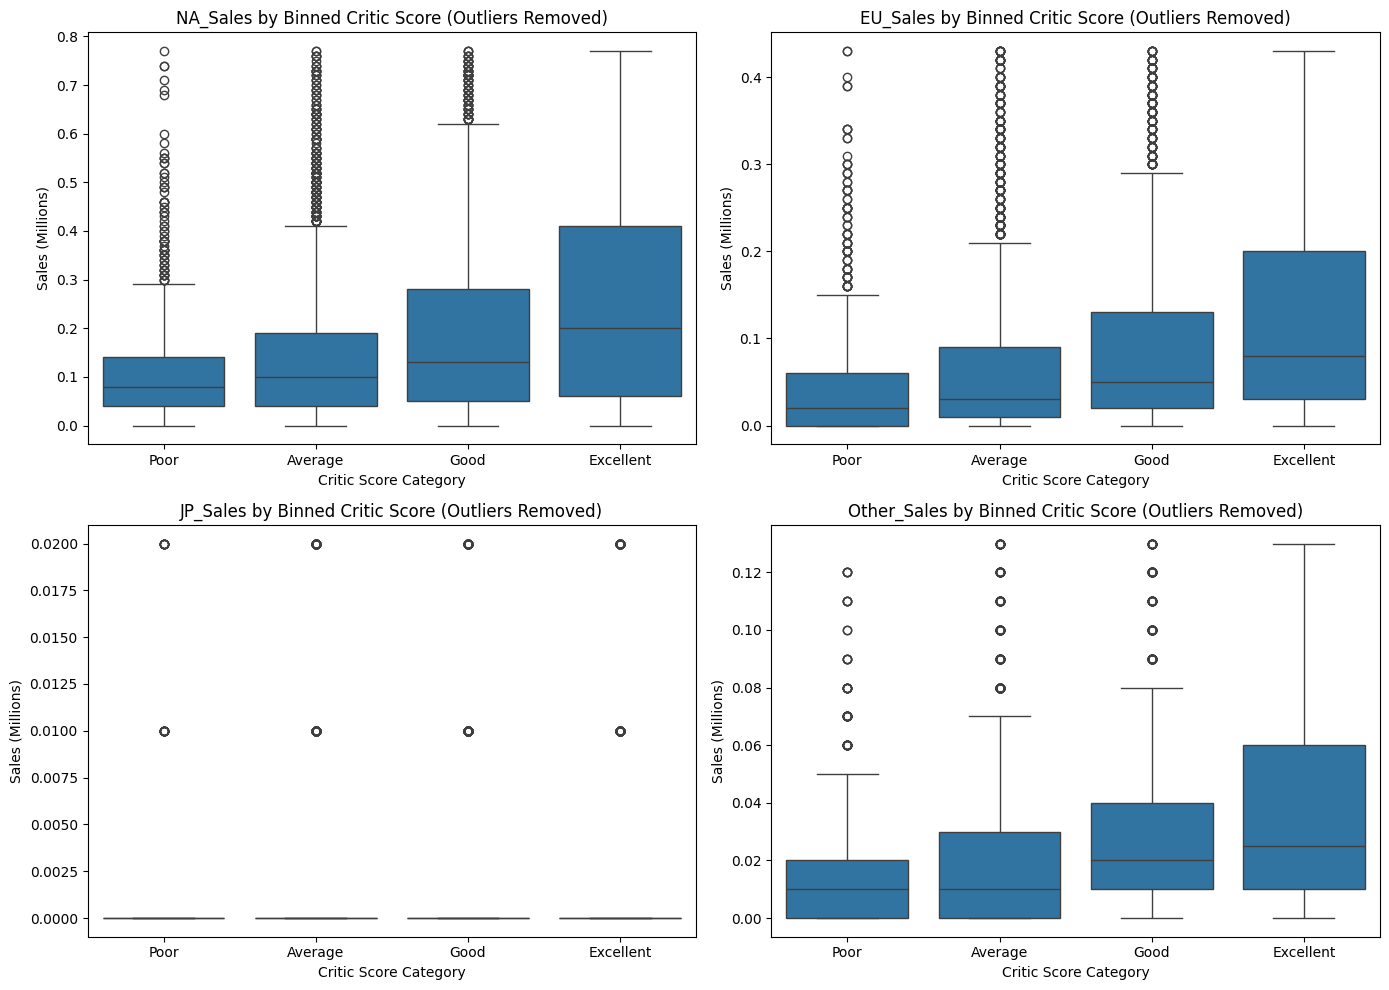

In [ ]:
# Copy to avoid modifying original
df_no_outliers = df_clean.copy()

# For each region, remove outliers based on IQR
#for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
#    Q1 = df_no_outliers[region].quantile(0.25)
#    Q3 = df_no_outliers[region].quantile(0.75)
#    IQR = Q3 - Q1
#    lower = Q1 - 1.5 * IQR
#    upper = Q3 + 1.5 * IQR
#    df_no_outliers = df_no_outliers[(df_no_outliers[region] >= lower) & (df_no_outliers[region] <= upper)]

# Now plot the boxplots
#fig, axes = plt.subplots(2, 2, figsize=(14, 10))
#axes = axes.flatten()
#regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

#for i, region in enumerate(regions):
#    sns.boxplot(data=df_no_outliers, x='Score_Bin', y=region, ax=axes[i])
#    axes[i].set_title(f'{region} by Binned Critic Score')
#    axes[i].set_xlabel('Critic Score Category')
#    axes[i].set_ylabel('Sales (Millions)')

#plt.tight_layout()
#plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Loop through each region and filter out its own outliers using IQR
for i, region in enumerate(regions):
    # Work on a copy of only the relevant columns
    df_region = df_clean[['Score_Bin', region]].dropna()

    # IQR filtering
    Q1 = df_region[region].quantile(0.25)
    Q3 = df_region[region].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Remove outliers for that region only
    df_filtered = df_region[(df_region[region] >= lower) & (df_region[region] <= upper)]

    # Plot
    sns.boxplot(data=df_filtered, x='Score_Bin', y=region, ax=axes[i])
    axes[i].set_title(f'{region} by Binned Critic Score (Outliers Removed)')
    axes[i].set_xlabel('Critic Score Category')
    axes[i].set_ylabel('Sales (Millions)')

plt.tight_layout()
plt.show()